In [73]:
import math
import pandas as pd

# CSVデータを読み込む
df_seattle = pd.read_csv('./data/seattle_weather.csv')
df_abashiri = pd.read_csv('./data/abashiri_weather.csv')
df_takada = pd.read_csv('./data/takada_weather.csv')
df_maebashi = pd.read_csv('./data/maebashi_weather.csv')
df_takamatsu = pd.read_csv('./data/takamatsu_weather.csv')
df_chiba = pd.read_csv('./data/chiba_weather.csv')
''' 
列名を変更する
・ダウンロードしたファイルにはなぜか降水量の合計が2つあるので、片っぽはunknownとした
・同じ項目を選択してダウンロードしても順番がなぜか入れ替わっていたりするので、ここでそれに合わせてカラム名を修正する。
'''
df_abashiri.columns = ['date', 'temp_min', 'precipitation', 'unknown', 'wind', 'weather', 'temp_max']
df_takada.columns = ['date', 'temp_min', 'precipitation', 'unknown', 'wind', 'weather', 'temp_max']
df_maebashi.columns = ['date', 'temp_min', 'precipitation', 'unknown', 'wind', 'weather', 'temp_max']
df_takamatsu.columns = ['date', 'temp_min', 'precipitation', 'unknown', 'wind', 'weather', 'temp_max']
df_chiba.columns = ['date', 'temp_min', 'precipitation', 'unknown', 'wind', 'weather', 'temp_max']
# 不要な列を削除する
df_seattle = df_seattle.drop(['weather'], axis=1)
df_abashiri = df_abashiri.drop(['unknown','weather'], axis=1)
df_takada = df_takada.drop(['unknown','weather'], axis=1)
df_maebashi= df_maebashi.drop(['unknown','weather'], axis=1)
df_takamatsu = df_takamatsu.drop(['unknown','weather'], axis=1)
df_chiba = df_chiba.drop(['unknown','weather'], axis=1)
# 日付の形式を変更する
df_abashiri['date'] = pd.to_datetime(df_abashiri['date']).dt.strftime('%Y-%m-%d')
df_takada['date'] = pd.to_datetime(df_takada['date']).dt.strftime('%Y-%m-%d')
df_maebashi['date'] = pd.to_datetime(df_maebashi['date']).dt.strftime('%Y-%m-%d')
df_takamatsu['date'] = pd.to_datetime(df_takamatsu['date']).dt.strftime('%Y-%m-%d')
df_chiba['date'] = pd.to_datetime(df_chiba['date']).dt.strftime('%Y-%m-%d')
# CSVデータとして出力する
df_seattle.to_csv('./data/seattle_weather_edited.csv', index=False)
df_abashiri.to_csv('./data/abashiri_weather_edited.csv', index=False)
df_takada.to_csv('./data/takada_weather_edited.csv', index=False)
df_maebashi.to_csv('./data/maebashi_weather_edited.csv', index=False)
df_takamatsu.to_csv('./data/takamatsu_weather_edited.csv', index=False)
df_chiba.to_csv('./data/chiba_weather_edited.csv', index=False)
# 平均気温のカラムを追加する
df_seattle['temp_avg'] = (df_seattle['temp_max'] + df_seattle['temp_min']) // 2
df_abashiri['temp_avg'] = (df_abashiri['temp_max'] + df_abashiri['temp_min']) // 2
df_takada['temp_avg'] = (df_takada['temp_max'] + df_takada['temp_min']) // 2
df_maebashi['temp_avg'] = (df_maebashi['temp_max'] + df_maebashi['temp_min']) // 2
df_takamatsu['temp_avg'] = (df_takamatsu['temp_max'] + df_takamatsu['temp_min']) // 2
df_chiba['temp_avg'] = (df_chiba['temp_max'] + df_chiba['temp_min']) // 2
# 欠損値のある行を削除
missing_rows:list[int]=[]
def getNullRecord(df:pd.DataFrame)->list[int]:
    indexes:list[int]=[]
    i=0
    for colmn_name,record in df.iterrows():
        if math.isnan(record['temp_avg']) or math.isnan(record['precipitation']) or math.isnan(record['wind']):
            indexes.append(i)
        else:
            pass
        i+=1
    return indexes
print(getNullRecord(df_takada))
missing_rows+=getNullRecord(df_seattle)
print(missing_rows)
missing_rows+= getNullRecord(df_abashiri)
print(missing_rows)
missing_rows+= getNullRecord(df_takada)
print(missing_rows)
missing_rows+= getNullRecord(df_maebashi)
print(missing_rows)
missing_rows+= getNullRecord(df_takamatsu)
print(missing_rows)
missing_rows+= getNullRecord(df_chiba)
print(missing_rows)
df_seattle = df_seattle.drop(missing_rows)
df_abashiri = df_abashiri.drop(missing_rows)
df_takada = df_takada.drop(missing_rows)
df_maebashi = df_maebashi.drop(missing_rows)
df_takamatsu = df_takamatsu.drop(missing_rows)
df_chiba = df_chiba.drop(missing_rows)

[748, 987, 988, 1025, 1123]
[]
[]
[748, 987, 988, 1025, 1123]
[748, 987, 988, 1025, 1123, 1432]
[748, 987, 988, 1025, 1123, 1432, 150]
[748, 987, 988, 1025, 1123, 1432, 150, 23, 645, 769]


網走
0.8202087186602438
0.1977563024337905
0.8322177267351862
1.8501827478292205


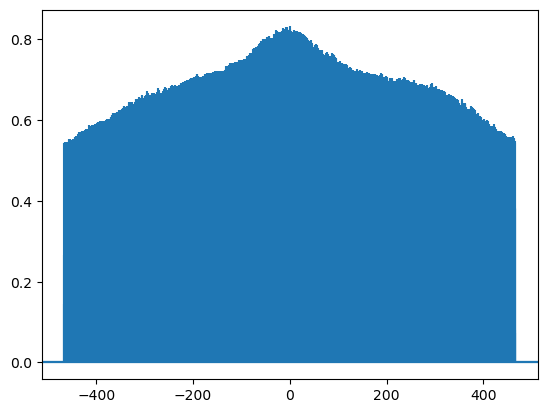

In [74]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import mlab
from scipy.spatial.distance import euclidean

print("網走")
# 相互相関コレログラム（原系列）
temp_xcor = plt.xcorr(df_abashiri['temp_avg'], 
                       df_seattle['temp_avg'],
                       detrend=mlab.detrend_none, 
                       maxlags=466)
print(max(temp_xcor[1]))
# 相互相関コレログラム（原系列）
precipitation_xcor = plt.xcorr(df_abashiri['precipitation'], 
                       df_seattle['precipitation'],
                       detrend=mlab.detrend_none, 
                       maxlags=466)
print(max(precipitation_xcor[1]))
# 相互相関コレログラム（原系列）
wind_xcor = plt.xcorr(df_abashiri['wind'], 
                       df_seattle['wind'],
                       detrend=mlab.detrend_none,
                       maxlags=466)
print(max(wind_xcor[1]))
print(max(temp_xcor[1])+max(precipitation_xcor[1])+max(wind_xcor[1]))
#plt.show()

高田
0.9562035212913084
0.3125130314411185
0.8511115462371462
2.119828098969573


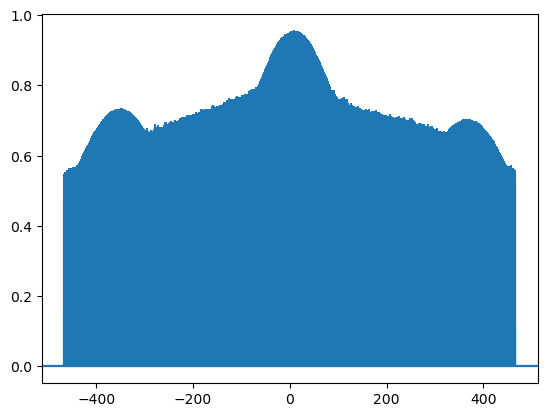

In [76]:
import matplotlib.pyplot as plt
from matplotlib import mlab
from scipy.spatial.distance import euclidean
print("高田")
# 相互相関コレログラム（原系列）
temp_xcor = plt.xcorr(df_takada['temp_avg'], 
                       df_seattle['temp_avg'],
                       detrend=mlab.detrend_none, 
                       maxlags=466)
print(max(temp_xcor[1]))
# 相互相関コレログラム（原系列）
precipitation_xcor = plt.xcorr(df_takada['precipitation'], 
                       df_seattle['precipitation'],
                       detrend=mlab.detrend_none, 
                       maxlags=466)
print(max(precipitation_xcor[1]))
# 相互相関コレログラム（原系列）
wind_xcor = plt.xcorr(df_takada['wind'], 
                       df_seattle['wind'],
                       detrend=mlab.detrend_none,
                       maxlags=466)
print(max(wind_xcor[1]))
print(max(temp_xcor[1])+max(precipitation_xcor[1])+max(wind_xcor[1]))

前橋
0.9648255893348755
0.20100893180974508
0.8771699629657609
2.0430044841103814


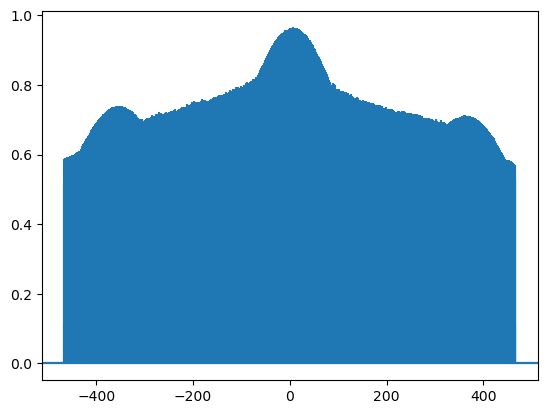

In [78]:
import matplotlib.pyplot as plt
from matplotlib import mlab
from scipy.spatial.distance import euclidean
print("前橋")
# 相互相関コレログラム（原系列）
temp_xcor = plt.xcorr(df_maebashi['temp_avg'], 
                       df_seattle['temp_avg'],
                       detrend=mlab.detrend_none, 
                       maxlags=466)
print(max(temp_xcor[1]))
# 相互相関コレログラム（原系列）
precipitation_xcor = plt.xcorr(df_maebashi['precipitation'], 
                       df_seattle['precipitation'],
                       detrend=mlab.detrend_none, 
                       maxlags=466)
print(max(precipitation_xcor[1]))
# 相互相関コレログラム（原系列）
wind_xcor = plt.xcorr(df_maebashi['wind'], 
                       df_seattle['wind'],
                       detrend=mlab.detrend_none,
                       maxlags=466)
print(max(wind_xcor[1]))
print(max(temp_xcor[1])+max(precipitation_xcor[1])+max(wind_xcor[1]))

高松
0.970189291915076
0.2134750860608304
0.844553773218645
2.0282181511945514


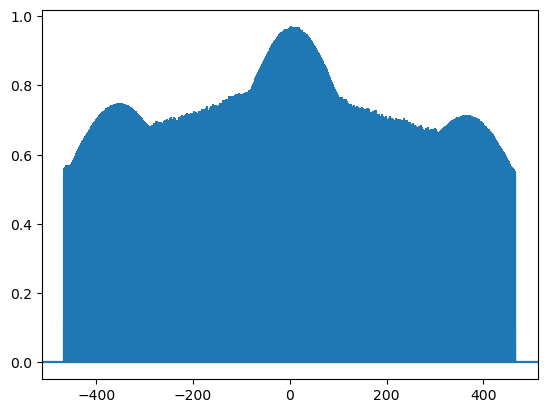

In [79]:
import matplotlib.pyplot as plt
from matplotlib import mlab
from scipy.spatial.distance import euclidean
print("高松")
# 相互相関コレログラム（原系列）
temp_xcor = plt.xcorr(df_takamatsu['temp_avg'], 
                       df_seattle['temp_avg'],
                       detrend=mlab.detrend_none, 
                       maxlags=466)
print(max(temp_xcor[1]))
# 相互相関コレログラム（原系列）
precipitation_xcor = plt.xcorr(df_takamatsu['precipitation'], 
                       df_seattle['precipitation'],
                       detrend=mlab.detrend_none, 
                       maxlags=466)
print(max(precipitation_xcor[1]))
# 相互相関コレログラム（原系列）
wind_xcor = plt.xcorr(df_takamatsu['wind'], 
                       df_seattle['wind'],
                       detrend=mlab.detrend_none,
                       maxlags=466)
print(max(wind_xcor[1]))
print(max(temp_xcor[1])+max(precipitation_xcor[1])+max(wind_xcor[1]))

千葉
0.9704692355470458
0.19263933890396054
0.8437445707581457
2.006853145209152


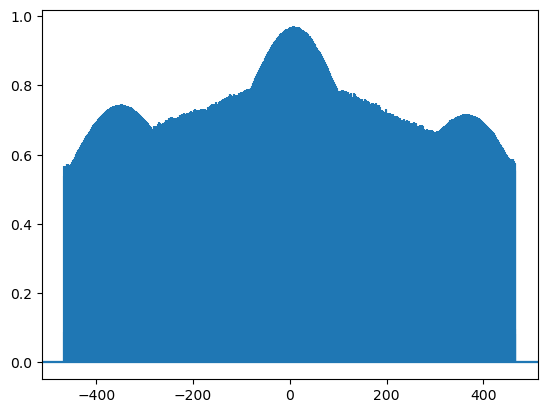

In [80]:
import matplotlib.pyplot as plt
from matplotlib import mlab
from scipy.spatial.distance import euclidean
print("千葉")
# 相互相関コレログラム（原系列）
temp_xcor = plt.xcorr(df_chiba['temp_avg'], 
                       df_seattle['temp_avg'],
                       detrend=mlab.detrend_none, 
                       maxlags=466)
print(max(temp_xcor[1]))
# 相互相関コレログラム（原系列）
precipitation_xcor = plt.xcorr(df_chiba['precipitation'], 
                       df_seattle['precipitation'],
                       detrend=mlab.detrend_none, 
                       maxlags=466)
print(max(precipitation_xcor[1]))
# 相互相関コレログラム（原系列）
wind_xcor = plt.xcorr(df_chiba['wind'], 
                       df_seattle['wind'],
                       detrend=mlab.detrend_none,
                       maxlags=466)
print(max(wind_xcor[1]))
print(max(temp_xcor[1])+max(precipitation_xcor[1])+max(wind_xcor[1]))